# Feature Management


In [1]:
# corrigir... ver as distribuições de cada feature e corrigir

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#scaling methods
# minmax
# standard
# robust
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# model
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

#### Load cleaned Dataset

In [3]:
learn_clean = pd.read_csv('datasetlearn_cleaned.csv', sep = ',', index_col = 0)
display(learn_clean.shape)
learn_clean.head()

(5196, 15)

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class_binary
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,Lisboa,227.0,207.0,42.74,22.8,5.7,0
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,Lisboa,306.0,245.0,41.73,11.6,4.0,0
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,Porto,121.0,186.0,75.10,20.3,7.5,1
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,Lisboa,357.0,186.0,46.41,73.3,4.2,1
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,Lisboa,202.0,218.0,56.52,80.1,6.0,0


In [4]:
learn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5196 entries, 1 to 5200
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ambient_humidity      5196 non-null   float64
 1   baking_duration       5196 non-null   float64
 2   cooling_period        5196 non-null   float64
 3   cream_fat_content     5196 non-null   float64
 4   egg_temperature       5196 non-null   float64
 5   egg_yolk_count        5196 non-null   float64
 6   final_temperature     5196 non-null   float64
 7   lemon_zest_ph         5196 non-null   float64
 8   origin                5196 non-null   object 
 9   oven_temperature      5196 non-null   float64
 10  preheating_time       5196 non-null   float64
 11  salt_ratio            5196 non-null   float64
 12  sugar_content         5196 non-null   float64
 13  vanilla_extract       5196 non-null   float64
 14  quality_class_binary  5196 non-null   int64  
dtypes: float64(13), int64(1), 

#### Encode Binary Feature

In [5]:
learn_clean['is_lisboa'] = learn_clean['origin'].map({'Lisboa': 1, 'Porto': 0})
learn_clean.drop(columns=['origin'], inplace=True)
learn_clean.head()


,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class_binary,is_lisboa
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,227.0,207.0,42.74,22.8,5.7,0,1
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,306.0,245.0,41.73,11.6,4.0,0,1
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,121.0,186.0,75.10,20.3,7.5,1,0
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,357.0,186.0,46.41,73.3,4.2,1,1
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,202.0,218.0,56.52,80.1,6.0,0,1


#### Define Features and Target

In [6]:
X = learn_clean.drop('quality_class_binary',axis = 1)
y = learn_clean['quality_class_binary']

In [7]:
learn_clean.head()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class_binary,is_lisboa
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,227.0,207.0,42.74,22.8,5.7,0,1
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,306.0,245.0,41.73,11.6,4.0,0,1
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,121.0,186.0,75.10,20.3,7.5,1,0
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,357.0,186.0,46.41,73.3,4.2,1,1
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,202.0,218.0,56.52,80.1,6.0,0,1


#### **Data Partition**

In [8]:
X_train_val, X_test, y_train_val, y_test  = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y  )

This will create two different datasets, one for train (80% of the data) and one for test (20% of the data). <br>
`shuffle` randomizes the order of the observations, and `stratify` makes it so that every dataset resulting from the split has the same proportion of each label of the dependent variable.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.25, random_state= 15, shuffle= True, stratify= y_train_val)

To create three datasets (train, validation and test) with the function train_test_split, the function has to be called twice. <br>
First we are going to create two sets of datasets, one for test (X_test and y_test) and another one that includes the data for training and validation (X_train_val and y_train_val).

Run the cell below to check the proportion of data for each dataset.

In [10]:
print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(y),2),
                                                     round(len(y_val)/len(y),2),
                                                     round(len(y_test)/len(y),2)
                                                    ))

train:0.6% | validation:0.2% | test:0.2%


In [11]:
kf = KFold(n_splits=10)

In [12]:
skf = StratifiedKFold(n_splits = 10)

In [13]:
rkf = RepeatedKFold(n_splits = 7, n_repeats= 2)

#### Identify Numerical Columns

In [14]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'is_lisboa' in numeric_cols:
    numeric_cols.remove('is_lisboa')

In [15]:
X_train_n = X_train[numeric_cols]
X_val_n   = X_val[numeric_cols]
X_test_n  = X_test[numeric_cols]

#### Scale Numeric Features with StandardScaler
Here we are going to standardize all our numerical features using a scaler to ensure they have a mean of 0 and a standard deviation of 1. This will prevent features with larger ranges from dominating the model training process. 
We use the StandardScaler here:

In [16]:
#Scaler
scaler = StandardScaler()

# Fit and Transform the Training Data
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_n),
    index=X_train_n.index,
    columns=numeric_cols
)

# Transform the Validation Data
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val_n),
    index=X_val_n.index,
    columns=numeric_cols
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_n),
    index=X_test_n.index,
    columns=numeric_cols
)


#### Add Binary Feature (is_lisboa) Back

In [17]:
X_train_final = pd.concat([X_train_scaled, X_train[['is_lisboa']]], axis=1)
X_val_final   = pd.concat([X_val_scaled, X_val[['is_lisboa']]], axis=1)
X_test_final  = pd.concat([X_test_scaled, X_test[['is_lisboa']]], axis=1)

#### Export Final Datasets

In [18]:
import pickle

# Save all train/val/test splits to a single pickle file for easy import in other notebooks
notebook3_data = {
    'X': X,
    'y': y,
    'X_train': X_train_final,
    'y_train': y_train,
    'X_val': X_val_final,
    'y_val': y_val,
    'X_test': X_test_final,
    'y_test': y_test,
    'X_train_val': X_train_val,
    'y_train_val': y_train_val,
    'numeric_cols': numeric_cols,
    'kf': kf,
    'rkf': rkf,
    'skf': skf

}

with open(r'Nata_Files\\train_test_split.pkl', 'wb') as f:
    pickle.dump(notebook3_data, f)

print("Train/Val/Test split data saved to Nata_Files/train_test_split.pkl")

Train/Val/Test split data saved to Nata_Files/train_test_split.pkl


# **NOTES**

Provavelmente, vamos ter de usar kFold CV então temos de fazer isso também!


### **Feature Selection**

#### **Filter Methods**

### 1. Check if there are constant variables

X_train_n_scl_rb.var()

In [19]:
X_train.var()

ambient_humidity      133.653210
baking_duration        53.850136
cooling_period        174.923566
cream_fat_content       3.945299
egg_temperature      1208.030651
egg_yolk_count          1.334923
final_temperature    7036.353988
lemon_zest_ph           0.026553
oven_temperature     6900.130490
preheating_time      1084.137332
salt_ratio            434.585088
sugar_content        2083.293209
vanilla_extract         1.740468
is_lisboa               0.179066
dtype: float64

### 2. Spearman Correlation

<b>We are going to check now the spearman correlation between the variables. First we need to create a new dataframe with all the training data, but containing also the dependent variable, so we can check if any of the independent variables are correlated with the target. Name this new dataframe as `all_train_n`. 


In [20]:
all_train_n = X_train.join(y_train)
all_train_n.head()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,is_lisboa,quality_class_binary
id,,,,,,,,,,,,,,,
681,53.0,28.0,31.0,100.9,75.0,11.0,159.0,3.3,169.0,253.0,82.62000,22.3,7.20,0,1
3771,78.0,25.0,48.0,98.6,98.0,12.0,191.0,3.1,210.0,219.0,47.17000,17.3,4.70,1,1
5156,45.0,23.0,32.0,100.1,67.0,9.0,268.0,3.3,271.0,210.0,46.05000,120.2,4.10,1,0
668,68.0,32.0,45.0,98.5,146.0,10.0,367.0,3.5,370.0,227.0,46.70000,144.2,3.90,1,1
2695,60.0,36.0,60.0,101.3,73.0,9.0,179.0,2.8,154.0,261.0,104.50875,31.9,8.55,0,0


In [21]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,7))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [22]:
cor_spearman = all_train_n.corr(method='spearman')

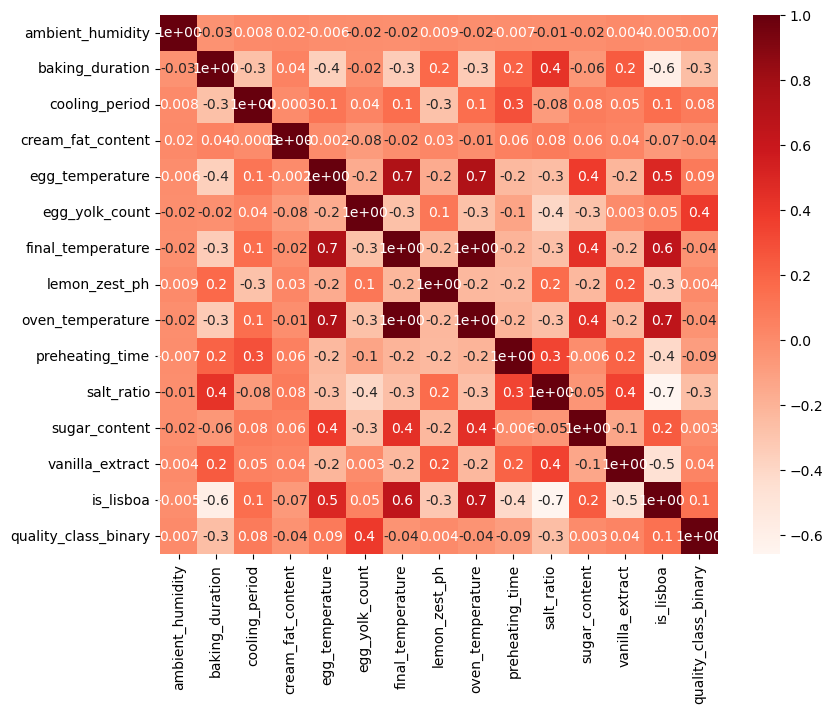

In [23]:
cor_heatmap(cor_spearman)